### Agenda
##### ♦ Problem Description
##### ♦ Data Understanding and exploration
##### ♦ Split the data into Train and Validation sets
##### ♦ Model Building
   - Logistic Regression

### Problem Description

A Regional Bank XYZ with 40000+ Customers would like to expand its business by predicting Customer's behavior to better sell cross products (eg: Selling Term Deposits to Retail Customers). The Bank has approached us to assess the same by providing access to their Customer campaign data.

The data is related with direct marketing campaigns. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Predict if an existing customer would subscribe to a Term Deposit

#### Attribute information:


Input variables:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

11 - duration: last contact duration, in seconds (numeric)

Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
16 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [49]:
# Load the required libraries:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For data preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score


### For model train
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

### for model evaluation
from sklearn.metrics import classification_report,confusion_matrix , roc_curve, auc

In [2]:
os.getcwd()

'C:\\Users\\lenovo'

In [3]:
# Read the data:
bank = pd.read_csv("Bank_Data.csv")
bank.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,apr,313,1,147,2,failure,no


In [4]:
# Understanding the data (shape, datatypes):
bank.shape


(4521, 16)

In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# Observing the summary statistics of the data:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
# Identifying column names of the data:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [8]:
# Identifying the distribution of target: 
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [9]:
# Recode the levels of target on data ; yes=1 and no=0:
bank["y"]=np.where(bank["y"]=="yes",1,0)
bank.head(15)
# we can also use :- bank.y.replace(["yes","no"],[1,0])

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,no,747,no,no,cellular,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,may,341,1,330,2,other,0
7,39,technician,married,secondary,no,147,yes,no,cellular,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,may,57,2,-1,0,unknown,0
9,43,services,married,primary,no,-88,yes,yes,cellular,apr,313,1,147,2,failure,0


In [10]:
bank.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [11]:
bank.y.dtype

dtype('int32')

In [12]:
# Applying type conversion for object datatypes:
cat_cols = list(bank.select_dtypes(include="object").columns)
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
bank[cat_cols] = bank[cat_cols].astype('category')
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int32
dtype: object

In [14]:
# Splitting the data into train and Validation sets:
X = bank.loc[:,bank.columns.difference(['y'])]
y = bank.y

In [15]:
display(X.head(10),y.head(10))

,age,balance,campaign,contact,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,30,1787,1,cellular,no,79,primary,no,unemployed,no,married,oct,-1,unknown,0
1,33,4789,1,cellular,no,220,secondary,yes,services,yes,married,may,339,failure,4
2,35,1350,1,cellular,no,185,tertiary,yes,management,no,single,apr,330,failure,1
3,30,1476,4,unknown,no,199,tertiary,yes,management,yes,married,jun,-1,unknown,0
4,59,0,1,unknown,no,226,secondary,yes,blue-collar,no,married,may,-1,unknown,0
5,35,747,2,cellular,no,141,tertiary,no,management,no,single,feb,176,failure,3
6,36,307,1,cellular,no,341,tertiary,yes,self-employed,no,married,may,330,other,2
7,39,147,2,cellular,no,151,secondary,yes,technician,no,married,may,-1,unknown,0
8,41,221,2,unknown,no,57,tertiary,yes,entrepreneur,no,married,may,-1,unknown,0
9,43,-88,1,cellular,no,313,primary,yes,services,yes,married,apr,147,failure,2


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=124)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3164, 15)
(1357, 15)
(3164,)
(1357,)


In [17]:
# Standardizing the numeric attributes in the train and test data:
num_cols = list(bank.select_dtypes(exclude="category").columns.drop(["y"]))
std = StandardScaler()
X_train[num_cols]=std.fit_transform(X_train[num_cols])
X_train.head(10)

,age,balance,campaign,contact,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
2190,-0.475621,-0.199692,0.997089,cellular,no,-0.749196,tertiary,no,technician,no,married,aug,-0.412923,unknown,-0.322547
378,1.136090,1.893449,-0.566081,unknown,no,-0.424182,primary,yes,technician,no,divorced,may,-0.412923,unknown,-0.322547
2643,1.420510,-0.402422,-0.566081,telephone,no,-0.905968,secondary,no,retired,yes,divorced,jul,-0.412923,unknown,-0.322547
113,-0.760040,-0.464052,-0.253447,cellular,no,-0.718607,secondary,no,blue-collar,no,single,jan,1.625969,failure,0.244104
555,-0.380814,-0.044969,-0.253447,cellular,no,1.598552,secondary,yes,admin.,no,married,may,0.430080,success,3.644008
4515,-0.854847,-0.317762,0.684455,cellular,no,1.376777,secondary,yes,services,no,single,jul,-0.412923,unknown,-0.322547
296,-1.139266,-0.324898,-0.566081,cellular,no,0.715278,tertiary,no,management,no,married,jan,-0.412923,unknown,-0.322547
2321,-1.328879,-0.453672,-0.253447,unknown,no,1.067058,secondary,yes,services,no,single,may,-0.412923,unknown,-0.322547
290,0.851671,0.861313,-0.253447,cellular,no,1.002055,primary,yes,blue-collar,no,married,aug,-0.412923,unknown,-0.322547
681,-0.949653,-0.389771,-0.253447,cellular,no,-0.412711,secondary,no,technician,yes,married,aug,-0.412923,unknown,-0.322547


In [18]:
# standardization for test data.
X_test[num_cols]=std.transform(X_test[num_cols])
X_test.head(10)

,age,balance,campaign,contact,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
4409,1.515316,-0.436480,-0.253447,cellular,no,-0.684193,secondary,no,retired,no,married,jul,-0.412923,unknown,-0.322547
2651,0.282831,0.496724,-0.253447,unknown,no,1.935037,secondary,yes,management,no,married,may,-0.412923,unknown,-0.322547
755,-0.854847,-0.231480,0.059187,cellular,no,-0.661251,secondary,yes,admin.,no,single,nov,-0.412923,unknown,-0.322547
3828,-0.949653,-0.510112,0.059187,cellular,no,-0.626838,unknown,yes,blue-collar,no,married,feb,1.567154,failure,0.810755
4009,-0.286008,-0.448482,0.059187,cellular,no,-0.034165,secondary,no,housemaid,no,divorced,oct,1.047629,success,0.244104
4072,0.377638,-0.471188,0.684455,unknown,no,1.185593,primary,no,blue-collar,no,married,may,-0.412923,unknown,-0.322547
194,-1.708105,2.518181,-0.253447,cellular,no,0.791752,secondary,no,student,no,single,jun,-0.412923,unknown,-0.322547
1167,-0.760040,-0.182825,-0.566081,unknown,no,-0.959499,secondary,yes,blue-collar,no,married,sep,3.253161,success,3.077358
999,-1.992525,-0.376797,0.684455,telephone,no,-0.351532,secondary,no,student,no,single,may,3.233556,failure,2.510707
2143,-0.380814,0.855150,-0.253447,cellular,no,0.095840,tertiary,yes,management,no,married,feb,1.302491,other,1.944056


In [19]:
# Using onehotencoder to add dummies.
ohe = OneHotEncoder()

In [20]:
C = pd.DataFrame(ohe.fit_transform(X_train[cat_cols]).toarray(),columns=ohe.get_feature_names(cat_cols))
C.set_index(X_train.index,inplace=True)
X_train = X_train[num_cols]
X_train = pd.concat([X_train,C],axis=1)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
X_train.head(10)

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2190,-0.475621,-0.199692,-0.749196,0.997089,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
378,1.136090,1.893449,-0.424182,-0.566081,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2643,1.420510,-0.402422,-0.905968,-0.566081,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113,-0.760040,-0.464052,-0.718607,-0.253447,1.625969,0.244104,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
555,-0.380814,-0.044969,1.598552,-0.253447,0.430080,3.644008,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4515,-0.854847,-0.317762,1.376777,0.684455,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,-1.139266,-0.324898,0.715278,-0.566081,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2321,-1.328879,-0.453672,1.067058,-0.253447,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
290,0.851671,0.861313,1.002055,-0.253447,-0.412923,-0.322547,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
681,-0.949653,-0.389771,-0.412711,-0.253447,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
D = pd.DataFrame(ohe.transform(X_test[cat_cols]).toarray(),columns=ohe.get_feature_names(cat_cols))
D.set_index(X_test.index,inplace=True)
X_test = X_test[num_cols]
X_test = pd.concat([X_test,D],axis=1)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
X_test.head(10)

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4409,1.515316,-0.436480,-0.684193,-0.253447,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2651,0.282831,0.496724,1.935037,-0.253447,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
755,-0.854847,-0.231480,-0.661251,0.059187,-0.412923,-0.322547,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3828,-0.949653,-0.510112,-0.626838,0.059187,1.567154,0.810755,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4009,-0.286008,-0.448482,-0.034165,0.059187,1.047629,0.244104,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4072,0.377638,-0.471188,1.185593,0.684455,-0.412923,-0.322547,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,-1.708105,2.518181,0.791752,-0.253447,-0.412923,-0.322547,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1167,-0.760040,-0.182825,-0.959499,-0.566081,3.253161,3.077358,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
999,-1.992525,-0.376797,-0.351532,0.684455,3.233556,2.510707,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2143,-0.380814,0.855150,0.095840,-0.253447,1.302491,1.944056,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Model Building:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
mod_logit = sm.Logit(y_train,X_train)

In [25]:
# Logit model:
result = mod_logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.239023
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                          Logit   Df Residuals:                     3122
Method:                           MLE   Df Model:                           41
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                  0.3315
Time:                        17:00:37   Log-Likelihood:                -756.27
converged:                       True   LL-Null:                       -1131.4
Covariance Type:            nonrobust   LLR p-value:                3.797e-131
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4615   6.05e+06  -7.62e-08      1.000   -1.19e+07    1.19e+07
age                    -0.0073      0.091     -0.080      0.937      -0.186       0.172
balance                -0.0418      0.065     -0.640      0.522      -0.170       0.086
duration                1.1028      0.064     17.238      0.000       0.977       1.228
campaign               -0.1467      0.099     -1.485      0.138      -0.340       0.047
pdays                  -0.0074      0.118     -0.062      0.950      -0.238       0.224
previous               -0.0038      0.081     -0.047      0.962      -0.162       0.155
job_admin.              0.1820   1.16e+07   1.57e-08      1.000   -2.27e+07    2.27e+07
job_blue-collar        -0.4683   1.06e+07  -4.41e-08      1.000   -2.08e+07    2.08e+07
job_entrepreneur        0.1241   1.17e+07   1.06e-08      1.000   -2.28e+07    2.28e+07
job_housemaid          -0.2372    1.1e+07  -2.15e-08      1.000   -2.16e+07    2.16e+07
job_management         -0.1611   1.15e+07   -1.4e-08      1.000   -2.26e+07    2.26e+07
job_retired             0.5485   1.22e+07   4.51e-08      1.000   -2.38e+07    2.38e+07
job_self-employed      -0.3891   1.24e+07  -3.14e-08      1.000   -2.43e+07    2.43e+07
job_services           -0.3009   1.08e+07  -2.79e-08      1.000   -2.11e+07    2.11e+07
job_student             0.4335   1.22e+07   3.54e-08      1.000    -2.4e+07     2.4e+07
job_technician         -0.1484   1.13e+07  -1.31e-08      1.000   -2.22e+07    2.22e+07
job_unemployed         -0.6177   1.11e+07  -5.56e-08      1.000   -2.18e+07    2.18e+07
job_unknown             0.5732   1.26e+07   4.55e-08      1.000   -2.47e+07    2.47e+07
marital_divorced        0.1262   3.71e+06    3.4e-08      1.000   -7.27e+06    7.27e+06
marital_married        -0.4345   3.57e+06  -1.22e-07      1.000      -7e+06       7e+06
marital_single         -0.1531   3.46e+06  -4.42e-08      1.000   -6.78e+06    6.78e+06
education_primary      -0.0069   4.97e+06   -1.4e-09      1.000   -9.74e+06    9.74e+06
education_secondary    -0.1279   5.41e+06  -2.36e-08      1.000   -1.06e+07    1.06e+07
education_tertiary      0.1465      5e+06   2.93e-08      1.000   -9.79e+06    9.79e+06
education_unknown      -0.4731   5.48e+06  -8.63e-08      1.000   -1.08e+07    1.08e+07
default_no             -0.2949        nan        nan        nan         nan         nan
default_yes            -0.1665        nan        nan        nan         nan         nan
housing_no             -0.0849   3.31e+06  -2.57e-08      1.000   -6.48e+06    6.48e+06
housing_yes            -0.3766   3.33e+06  -1.13e-07      1.000   -6.52e+06    6.52e+06
loan_no                 0.2275   2.48e+06   9.17e-08      1.000   -4.86e+06    4.86e+06
loan_yes               -0.6889   2.48e+06  -2.78e-07      1.000   -4.86e+06    4.86e+06
contact_cellular        0.3050        nan        nan        nan         nan         nan
contact_telephone       0.2912        nan        nan        nan         n

In [26]:
test_pred = result.predict(X_test)

In [27]:
test_pred = np.where(test_pred<0.5,0,1)

In [28]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
confusion_matrix(y_test,test_pred)

array([[1169,   32],
       [ 103,   53]], dtype=int64)

In [30]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1201
           1       0.62      0.34      0.44       156

    accuracy                           0.90      1357
   macro avg       0.77      0.66      0.69      1357
weighted avg       0.89      0.90      0.89      1357



In [31]:
train_pred = result.predict(X_train)
R = roc_curve(y_train,train_pred)
R

(array([0.00000000e+00, 3.57270454e-04, 3.57270454e-04, 7.14540907e-04,
        7.14540907e-04, 1.07181136e-03, 1.07181136e-03, 1.42908181e-03,
        1.42908181e-03, 2.50089318e-03, 2.50089318e-03, 3.57270454e-03,
        3.57270454e-03, 5.71632726e-03, 5.71632726e-03, 6.07359771e-03,
        6.07359771e-03, 6.43086817e-03, 6.43086817e-03, 6.78813862e-03,
        6.78813862e-03, 7.14540907e-03, 7.14540907e-03, 7.50267953e-03,
        7.50267953e-03, 8.57449089e-03, 8.57449089e-03, 9.64630225e-03,
        9.64630225e-03, 1.00035727e-02, 1.00035727e-02, 1.03608432e-02,
        1.03608432e-02, 1.07181136e-02, 1.07181136e-02, 1.10753841e-02,
        1.10753841e-02, 1.14326545e-02, 1.14326545e-02, 1.25044659e-02,
        1.25044659e-02, 1.28617363e-02, 1.28617363e-02, 1.35762772e-02,
        1.35762772e-02, 1.42908181e-02, 1.42908181e-02, 1.46480886e-02,
        1.46480886e-02, 1.50053591e-02, 1.50053591e-02, 1.53626295e-02,
        1.53626295e-02, 1.60771704e-02, 1.60771704e-02, 1.643444

In [33]:
#Logistic Regression:
logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)

LogisticRegression()

In [34]:
# Generating predictions:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [35]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
logistic_model.coef_

array([[-5.50921149e-04,  7.76518840e-03, -3.69693769e-02,
         1.08400102e+00, -1.48364686e-01,  6.12817332e-03,
         6.34497773e-03,  2.25196698e-01, -4.02172272e-01,
         1.32082739e-01, -1.53715332e-01, -1.03534935e-01,
         5.56012411e-01, -3.06348381e-01, -2.33201671e-01,
         4.55973396e-01, -9.42142428e-02, -4.76827607e-01,
         4.00198275e-01,  2.53989199e-01, -2.74389283e-01,
         1.98491636e-02,  8.05993736e-02, -2.44735564e-02,
         2.44493132e-01, -3.01169870e-01, -4.85893311e-02,
         4.80384099e-02,  1.57895291e-01, -1.58446212e-01,
         4.46289984e-01, -4.46840905e-01,  4.35759009e-01,
         4.13886995e-01, -8.50196925e-01, -2.27284957e-01,
        -3.95163675e-01,  4.91812733e-01, -7.58240495e-02,
        -7.01524148e-01, -6.61833189e-01,  3.67398334e-01,
         1.17656513e+00, -6.20072994e-01, -1.00551237e+00,
         9.82460340e-01,  6.68427927e-01, -5.38469304e-01,
        -2.98119161e-01,  1.64364385e+00, -8.07606307e-0

In [37]:
# Confusion Matrix:
confusion_matrix(y_train,train_preds)

array([[2740,   59],
       [ 237,  128]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [40]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_test,test_preds)
test_recall_1= recall_score(y_test,test_preds)
test_precision_1= precision_score(y_test,test_preds)

In [41]:
print(train_accuracy_1)
print(train_recall_1)
print(train_precision_1)

print(test_accuracy_1)
print(test_recall_1)
print(test_precision_1)

0.9064475347661188
0.3506849315068493
0.6844919786096256
0.8997789240972734
0.3269230769230769
0.6219512195121951


### ROC and AUC 

In [45]:
fpr, tpr, threshold = roc_curve(y_train, train_preds_prob)
roc_auc = auc(fpr, tpr)

<IPython.core.display.Javascript object>


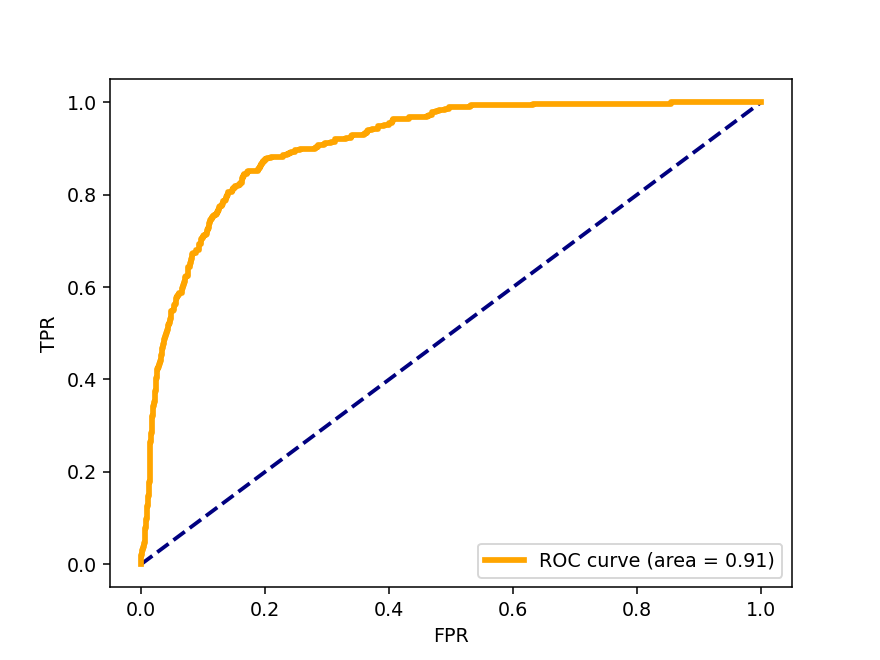

In [50]:

%matplotlib notebook
# plt.figure()
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")